# Homework 1

**Start date:** *18th Jan 2017*

**Due date:** *04 February 2017, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw1.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).

## The Assignment

### Objectives

You will use TensorFlow to implement several neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

Hint: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [38]:
# Import useful libraries.
import numpy as np
import pprint
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Global variables.
log_period_samples = 20000
batch_size = 100
input_dim = 784
output_dim = 10

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, setting in enumerate(results.keys()):
      train_accuracy = results[setting]['train_accuracy']
      test_accuracy = results[setting]['test_accuracy']
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Experiment {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, setting in enumerate(results.keys()):
      train_accuracy = results[setting]['train_accuracy']
      test_accuracy = results[setting]['test_accuracy']
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Model 1 (20 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [39]:
class ModelOne(object):
  
  def __init__(self, x, y, optimizer):
    self.x = x
    self.y = y
    self.optimizer = optimizer
    
    self.layers = []
    self.logits, self.y_hat = self.infer()
    self.accuracy, self.loss = self.eval()
    self.train_op = self.train()
    
  def infer(self):
    self.layers.append(tf.layers.dense(inputs=self.x,
                                       units=10))
    y_hat = tf.nn.softmax(self.layers[-1])
    return self.layers[-1], y_hat
  
  def eval(self):
    correct_predictions = tf.equal(tf.argmax(self.y, 1),
                                   tf.argmax(self.y_hat, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions,
                                      dtype=tf.float32))
    loss = tf.nn.softmax_cross_entropy_with_logits(
        labels=self.y,
        logits=self.logits)
    loss = tf.reduce_sum(loss)
    return accuracy, loss
  
  def train(self):
    train_op = self.optimizer.minimize(self.loss)
    return train_op

In [40]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = {}
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [41]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for num_epochs, learning_rate in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  optimizer = tf.train.GradientDescentOptimizer(
      learning_rate=learning_rate)
  model = ModelOne(x, y, optimizer)

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      _, loss = sess.run([model.train_op, model.loss],
                         feed_dict={x: batch_xs, y: batch_ys})
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        acc = sess.run(model.accuracy,
                       feed_dict={x: batch_xs, y: batch_ys})
        train_accuracy.append(acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        acc = []
        for i in range(10000 // batch_size):
          batch_xs, batch_ys = eval_mnist.test.next_batch(batch_size)
          batch_acc = sess.run(model.accuracy,
                 feed_dict={x: batch_xs, y: batch_ys})
          acc.append(batch_acc)
        test_accuracy.append(np.mean(acc))

  experiments_task1[(num_epochs, learning_rate)] = dict(
      train_accuracy=train_accuracy,
      test_accuracy=test_accuracy)

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [42]:
# print results for experiment 1
pprint.pprint(experiments_task1)

{(5, 0.0001): {'test_accuracy': [0.7774001,
                                 0.81210005,
                                 0.8273,
                                 0.8350001,
                                 0.84430003,
                                 0.8527,
                                 0.8565,
                                 0.8597001,
                                 0.86420006,
                                 0.86880004,
                                 0.8721,
                                 0.8719,
                                 0.87609994,
                                 0.8765,
                                 0.87810004,
                                 0.8801999,
                                 0.8809999,
                                 0.88240004,
                                 0.88339996,
                                 0.88360006,
                                 0.88509995,
                                 0.88460004,
                                 0.887,

# Model 2 (20 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [43]:
class ModelTwo(object):
  
  def __init__(self, x, y, optimizer):
    self.x = x
    self.y = y
    self.optimizer = optimizer
    
    self.layers = []
    self.logits, self.y_hat = self.infer()
    self.accuracy, self.loss = self.eval()
    self.train_op = self.train()

    
  def infer(self):
    self.layers.append(tf.layers.dense(inputs=self.x,
                                       units=32,
                                       activation=tf.nn.relu))
    self.layers.append(tf.layers.dense(inputs=self.layers[-1],
                                       units=10))
    y_hat = tf.nn.softmax(self.layers[-1])
    return self.layers[-1], y_hat
  
  def eval(self):
    correct_predictions = tf.equal(tf.argmax(self.y, 1),
                                   tf.argmax(self.y_hat, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions,
                                      dtype=tf.float32))
    loss = tf.nn.softmax_cross_entropy_with_logits(
        labels=self.y,
        logits=self.logits)
    loss = tf.reduce_sum(loss)
    return accuracy, loss
  
  def train(self):
    train_op = self.optimizer.minimize(self.loss)
    return train_op

In [44]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = {}
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [45]:
print('Training Model 2')

# Train Model 2 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=learning_rate)
  model = ModelTwo(x, y, optimizer)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      _, loss = sess.run([model.train_op, model.loss],
                   feed_dict={x: batch_xs, y: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        acc = sess.run(model.accuracy,
                       feed_dict={x: batch_xs, y: batch_ys})
        train_accuracy.append(acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        acc = []
        for i in range(10000 // batch_size):
          batch_xs, batch_ys = eval_mnist.test.next_batch(batch_size)
          batch_acc = sess.run(model.accuracy,
                 feed_dict={x: batch_xs, y: batch_ys})
          acc.append(batch_acc)
        test_accuracy.append(np.mean(acc))

  experiments_task2[(num_epochs, learning_rate)] = dict(
      train_accuracy=train_accuracy,
      test_accuracy=test_accuracy)

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [46]:
# print results for experiment 2
pprint.pprint(experiments_task2)

{(15, 0.0001): {'test_accuracy': [0.6879,
                                  0.77520007,
                                  0.81429994,
                                  0.84309995,
                                  0.85730004,
                                  0.8630001,
                                  0.87250006,
                                  0.87850004,
                                  0.8822,
                                  0.8836,
                                  0.88660014,
                                  0.89129996,
                                  0.8939001,
                                  0.89449996,
                                  0.8953,
                                  0.89910007,
                                  0.90120006,
                                  0.89919996,
                                  0.9001,
                                  0.9034999,
                                  0.9050999,
                                  0.90550005,
            

# Model 3 (20 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [47]:
class ModelThree(object):
  
  def __init__(self, x, y, optimizer):
    self.x = x
    self.y = y
    self.optimizer = optimizer
    
    self.layers = []
    self.logits, self.y_hat = self.infer()
    self.accuracy, self.loss = self.eval()
    self.train_op = self.train()
    
  def infer(self):
    self.layers.append(tf.layers.dense(inputs=self.x,
                                       units=32,
                                       activation=tf.nn.relu))
    self.layers.append(tf.layers.dense(inputs=self.layers[-1],
                                       units=10,
                                       activation=tf.nn.relu))
    self.layers.append(tf.layers.dense(inputs=self.layers[-1],
                                       units=10))
    y_hat = tf.nn.softmax(self.layers[-1])
    return self.layers[-1], y_hat
  
  def eval(self):
    correct_predictions = tf.equal(tf.argmax(self.y, 1),
                                   tf.argmax(self.y_hat, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions,
                                      dtype=tf.float32))
    loss = tf.nn.softmax_cross_entropy_with_logits(
        labels=self.y,
        logits=self.logits)
    loss = tf.reduce_sum(loss)
    return accuracy, loss
  
  def train(self):
    train_op = self.optimizer.minimize(self.loss)
    return train_op

In [48]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = {}
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [49]:
print('Training Model 3')

# Train Model 3 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=learning_rate)
  model = ModelThree(x, y, optimizer)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      _, loss = sess.run([model.train_op, model.loss],
                         feed_dict={x: batch_xs, y: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        acc = sess.run(model.accuracy,
                       feed_dict={x: batch_xs, y: batch_ys})
        train_accuracy.append(acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        acc = []
        for i in range(10000 // batch_size):
          batch_xs, batch_ys = eval_mnist.test.next_batch(batch_size)
          batch_acc = sess.run(model.accuracy,
                 feed_dict={x: batch_xs, y: batch_ys})
          acc.append(batch_acc)
        test_accuracy.append(np.mean(acc))

  experiments_task3[(num_epochs, learning_rate)] = dict(
      train_accuracy=train_accuracy,
      test_accuracy=test_accuracy)

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [50]:
# print results for experiment 3
pprint.pprint(experiments_task3)

{(5, 0.003): {'test_accuracy': [0.9136,
                                0.9075001,
                                0.9207,
                                0.933,
                                0.9377,
                                0.94250005,
                                0.9458999,
                                0.93499994,
                                0.9521999,
                                0.95089996,
                                0.95089996,
                                0.95000005,
                                0.9558,
                                0.9441999,
                                0.9579,
                                0.95449996,
                                0.95669997,
                                0.9551,
                                0.9595999,
                                0.9556,
                                0.94740003,
                                0.9548999,
                                0.95879996,
                           

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [51]:
class ModelFour(object):
  
  def __init__(self, x, y, optimizer):
    self.x = tf.reshape(x, [-1, 28, 28, 1])
#     self.x = x
    self.y = y
    self.optimizer = optimizer
    
    self.layers = []
    self.logits, self.y_hat = self.infer()
    self.accuracy, self.loss = self.eval()
    self.train_op = self.train()
    
  def infer(self):
    # first conv layer and max pool
    self.layers.append(tf.layers.conv2d(inputs=self.x,
                                        filters=8,
                                        kernel_size=(3, 3)))
    self.layers.append(tf.layers.max_pooling2d(inputs=self.layers[-1],
                                               pool_size=(2, 2),
                                               strides=2))
                       
    # second conv layer and max pool
    self.layers.append(tf.layers.conv2d(inputs=self.layers[-1],
                                        filters=8,
                                        kernel_size=(3, 3)))
    self.layers.append(tf.layers.max_pooling2d(inputs=self.layers[-1],
                                               pool_size=(3, 3),
                                               strides=2))
                       
    # flatten
    self.layers.append(tf.contrib.layers.flatten(self.layers[-1]))

    # fully connected layers
    self.layers.append(tf.layers.dense(inputs=self.layers[-1],
                                       units=10,
                                       activation=tf.nn.relu))
    self.layers.append(tf.layers.dense(inputs=self.layers[-1],
                                       units=10))
    y_hat = tf.nn.softmax(self.layers[-1])
    return self.layers[-1], y_hat
  
  def eval(self):
    correct_predictions = tf.equal(tf.argmax(self.y, 1),
                                   tf.argmax(self.y_hat, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions,
                                      dtype=tf.float32))
    loss = tf.nn.softmax_cross_entropy_with_logits(
        labels=self.y,
        logits=self.logits)
    loss = tf.reduce_sum(loss)
    return accuracy, loss
  
  def train(self):
    train_op = self.optimizer.minimize(self.loss)
    return train_op

In [52]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = {}
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [53]:
print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=learning_rate)
  model = ModelFour(x, y, optimizer)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      _, loss = sess.run([model.train_op, model.loss],
                         feed_dict={x: batch_xs, y: batch_ys})

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        acc = sess.run(model.accuracy,
                       feed_dict={x: batch_xs, y: batch_ys})
        train_accuracy.append(acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        acc = []
        for i in range(10000 // batch_size):
          batch_xs, batch_ys = eval_mnist.test.next_batch(batch_size)
          batch_acc = sess.run(model.accuracy,
                 feed_dict={x: batch_xs, y: batch_ys})
          acc.append(batch_acc)
        test_accuracy.append(np.mean(acc))

  experiments_task4[(num_epochs, learning_rate)] = dict(
      train_accuracy=train_accuracy,
      test_accuracy=test_accuracy)

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

In [54]:
# print results for experiment 4
pprint.pprint(experiments_task4)

{(5, 0.01): {'test_accuracy': [0.11350001,
                               0.113500014,
                               0.098200016,
                               0.11349999,
                               0.098000005,
                               0.11349999,
                               0.11349999,
                               0.11350001,
                               0.100999996,
                               0.11349999,
                               0.11350001,
                               0.11350001,
                               0.11349999,
                               0.11350002,
                               0.11349999,
                               0.102800004,
                               0.11350001,
                               0.11349999,
                               0.11349999,
                               0.11350001,
                               0.11350001,
                               0.10320002,
                               0.10100001,
      

# Results

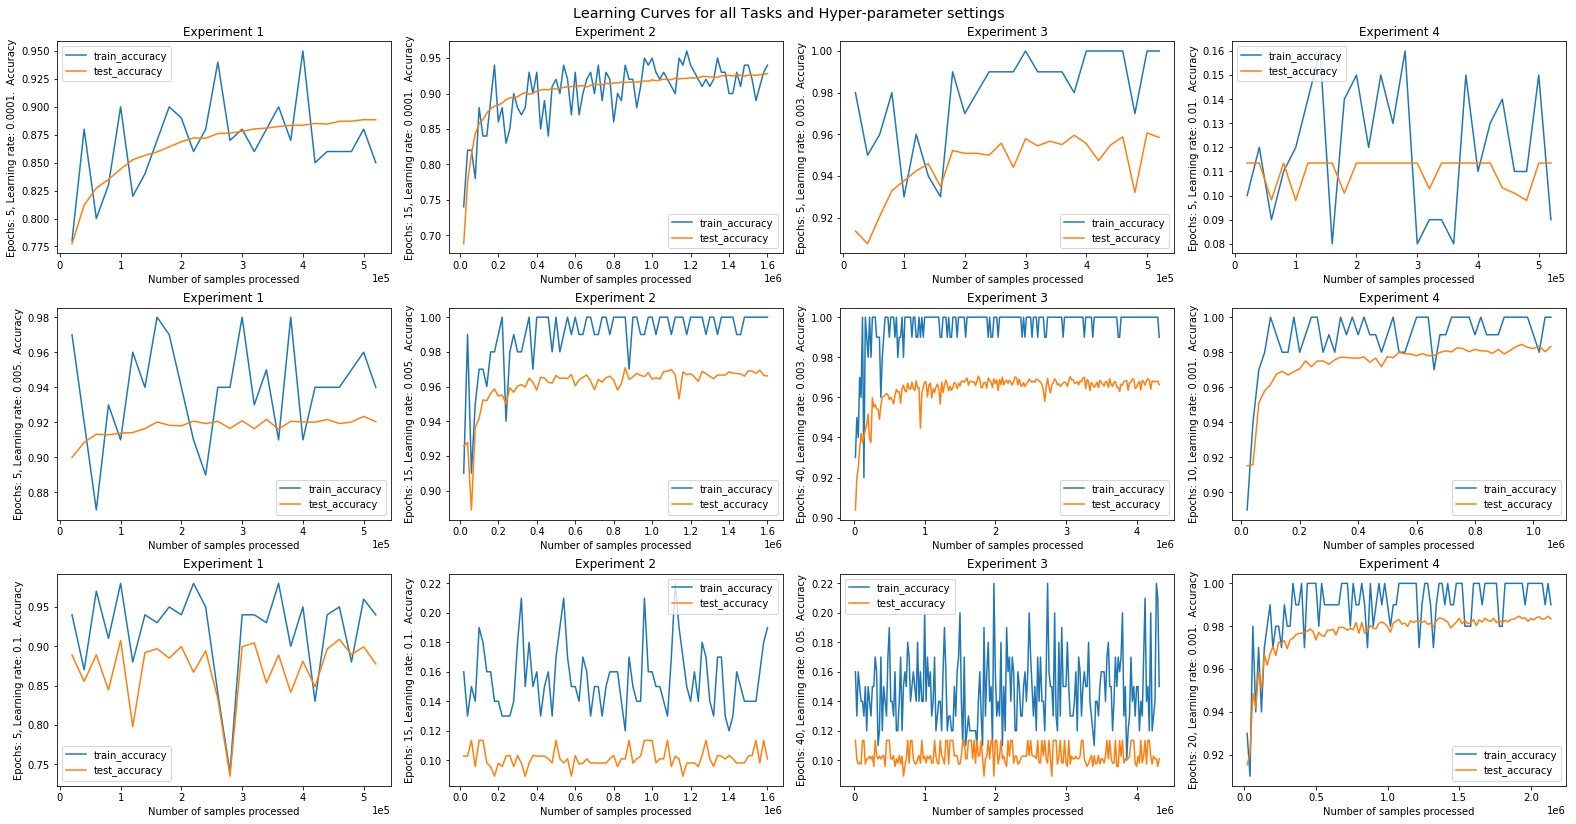

In [55]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

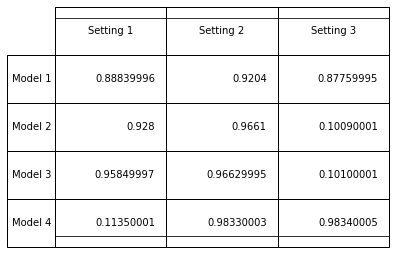

In [56]:
# Print final test accuracies
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

### Q1 (5 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Model 1, Settings 2 and 3; Model 2, Setting 3; Model 3, Settings 2 and 3 are all likely examples of overfitting. This happens because the models are overtrained on the training data that they fail to generalize to the test data.

### Q2 (5 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

Model 2, Setting 1; Model 4, Setting 1 are examples of under-fitting. The model hasn't been trained for a sufficiently long period to learn how to correctly classify the digits. This can be rectified by training for longer, as shown by the test accuracy increasing as the number of epochs increases.

### Q3 (10 pts): How would you prevent over-/under-fitting from happening?

Train the model for the "right" amount, where the right amount is determined by performance on a dataset that is thought to accurately capture any data not in the dataset.